In [1]:
import numpy
import pandas
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("xxxxxxxxxxxxxxxxx/cifar-10-batches")
batch1 = pandas.read_pickle("data_batch_1")
batch2 = pandas.read_pickle("data_batch_2")
batch3 = pandas.read_pickle("data_batch_3")
batch4 = pandas.read_pickle("data_batch_4")
batch5 = pandas.read_pickle("data_batch_5")
batch6 = pandas.read_pickle("data_batch_6")

#data=data.to_numpy()


In [3]:
#for each in batch:
  #print(each)
def pre_process(x,y):
  m=len(y)
  print("m: ",m)
  print(type(x))
  x = (x/255).astype('float32')
  print(numpy.shape(x))
  x=x.T
  print("x: ",numpy.shape(x))
  
  print(numpy.shape(y))
  y = numpy.array(y).reshape(1,m)
  print("pre_y: ",numpy.shape(y))
  yn=numpy.zeros((10,m))
  
  for i in range(m):
    yn[y[0][i]][i]=1
    yn=yn.astype('float32')
  
  #for i in range(m):
  #print(pre_y[0][i],' ',y[0:10,i:i+1])
  
  print("y: ",numpy.shape(yn))
  print(numpy.unique(y,return_counts=True))
  return x,yn


In [22]:
x1=batch1[b'data']
x2=batch2[b'data']
x3=batch3[b'data']
x4=batch4[b'data']
x5=batch5[b'data']
x=numpy.vstack((x1,x2,x3,x4,x5))
x6=batch6[b'data']


pre_y1 = batch1[b'labels']
pre_y2 = batch2[b'labels']
pre_y3 = batch3[b'labels']
pre_y4 = batch4[b'labels']
pre_y5 = batch5[b'labels']
pre_y = numpy.hstack((pre_y1,pre_y2,pre_y3,pre_y4,pre_y5)).reshape(-1,1)
pre_y6 = batch6[b'labels']

print(numpy.shape(pre_y1))
print(numpy.shape(x1))
#x_pre_train,y_pre_train=pre_process(x1,pre_y1)
x,y=pre_process(x,pre_y)
x_test,y_test=pre_process(x6,pre_y6)
print(numpy.shape(x_pre_train))
print(numpy.shape(y_pre_train))
#for each in range(y_pre_train.shape[1]):
  #print(y_pre_train[0:1,each]," ")

(10000,)
(10000, 1024)
m:  50000
<class 'numpy.ndarray'>
(50000, 1024)
x:  (1024, 50000)
(50000, 1)
pre_y:  (1, 50000)
y:  (10, 50000)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
m:  10000
<class 'numpy.ndarray'>
(10000, 1024)
x:  (1024, 10000)
(10000,)
pre_y:  (1, 10000)
y:  (10, 10000)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))
(1024, 10000)
(10, 10000)


(1024, 1)


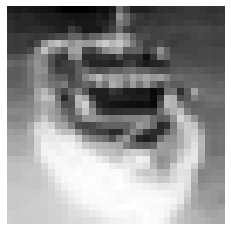

8



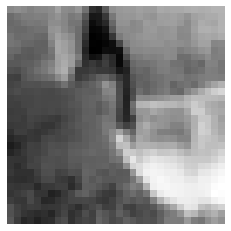

2



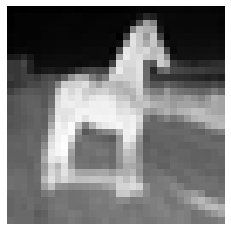

7



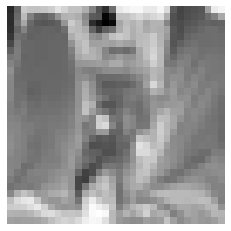

5



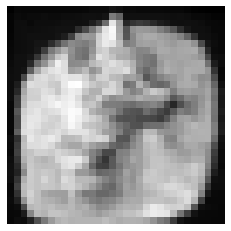

3



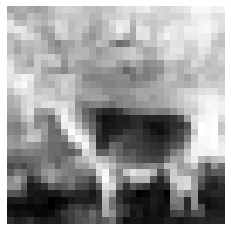

4



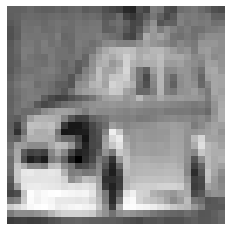

1



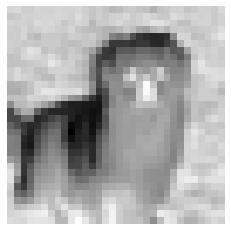

5



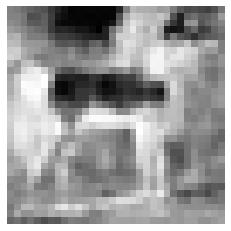

7



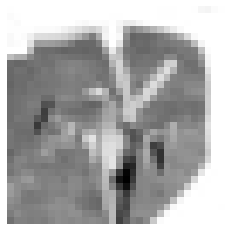

0



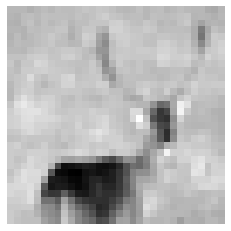

4



In [23]:
f=x[0:1024,0:1]
#f=f.T
print(numpy.shape(f))
for i in range(11):
  ind=i+170
  pic=(x[0:1024,ind:ind+1]).reshape(32,32)
  pic=pic/255
  plt.imshow(pic, cmap = plt.cm.binary)
  plt.axis("off")
  plt.show()
  print(y[ind])
  print()

In [24]:
class model:
  def __init__(self):
    self.layers=[]
    self.number_of_layers=0
    self.weights={}
    self.bias={}


  def layer(self,n):
    self.layers.append(n)
    self.number_of_layers+=1
    return

  def initialize_weights(self):
    numpy.random.seed(7)
    l = self.number_of_layers
    for i in range(l-1):
      wrange=numpy.sqrt(6/(self.layers[i]+self.layers[i+1]))
      #wrange=1
      w=numpy.random.uniform(wrange,-wrange,(self.layers[i+1],self.layers[i]))
      #w=w*numpy.sqrt(1/(self.layers[i]+self.layers[i+1]))
      b=numpy.zeros((self.layers[i+1],1))
      self.bias[i]=b
      self.weights[i]=w
  
  def sigmoid(self,z):
    return 1/(1+numpy.exp(-z))

  def hypothesis(self,x):
    alist=[]
    alist.append(x)
    for i in range(self.number_of_layers-2):
      z=numpy.dot(self.weights[i],x)+self.bias[i]
      a=self.sigmoid(z)
      alist.append(a)
      #print(i," ",z," ",a)
      #print(numpy.shape(a))
      x=a
    z=numpy.dot(self.weights[self.number_of_layers-2],x)+self.bias[self.number_of_layers-2]
    a=numpy.exp(z)/numpy.sum(numpy.exp(z), axis=0)
    alist.append(a)
    h=a
    return h,alist


  def predict(self,x):
    h,temp = self.hypothesis(x)
    cost=0
    #h->  sample x 10
    m=numpy.shape(h)[1]
    print(m)
    for i in range(m):
      if numpy.argmax(h[:,i:i+1])!=numpy.argmax(y[:,i:i+1]):
        maxx=numpy.max(h[:,i:i+1])
        #print("max ",maxx)
        #out=h[i]/maxx
        #print(numpy.argmax(h[:,i:i+1]),"\n",h[:,i:i+1].reshape(1,10),"\n",y[:,i:i+1].reshape(1,10),"")
        cost+=1
    return cost

  def test(self):
    print("EX")


In [25]:
class trainer:
  
  def __init__(self,model,alpha,mini_batch,print_frequency,show_plot):
    self.model = model
    self.alpha = alpha
    self.print_frequency = print_frequency
    self.show_plot = show_plot



  def Loss(self,h,y):
    #s=(numpy.square(h-y))
    #s=numpy.sum(s)/len(y)
    #return(s)
    lsum = numpy.sum(numpy.multiply(y, numpy.log(h)))
    m = y.shape[1]
    #print(numpy.shape(y))
    loss = -(1/m) * lsum
    return loss
    
    
  def back_propagation(self,alist,x,h,y):
    dwlist={}
    dblist={}
    num=self.model.number_of_layers-2
    m=numpy.shape(x)[1]


    '''
    for each in alist:
      print(numpy.shape(each))

    print()

    for each in self.model.weights.keys():
      print(numpy.shape(self.model.weights[each]))
    '''


    dz=h-y
    dw=(1./m)*(numpy.dot(dz,alist[num].T))
    db=(1./m)*numpy.sum(dz,axis=1,keepdims=True)
    dwlist[num]=dw
    dblist[num]=db
    num-=1
    '''
    print()
    print(num)
    print(numpy.shape(dz))
    print(numpy.shape(dw))
    print(numpy.shape(db))
    '''

    for i in range(num,-1,-1):
      #print("num: ",num)
      da=numpy.dot(self.model.weights[i+1].T,dz)
      dz=da*alist[i+1]*(1-alist[i+1])
      dw=(1./m)*(numpy.dot(dz,alist[i].T))
      db=(1./m)*numpy.sum(dz,axis=1,keepdims=True)
      dwlist[i]=dw
      dblist[i]=db

    return dwlist,dblist

  def mini_batch(self,x,y,batch_size):
    batches = [] 
    data = numpy.vstack((x,y))
    m=data.shape[1]
    numpy.random.seed(7)
    p=numpy.random.permutation(m)
    data= data[:,p]
    batch_count = (int)(data.shape[1]/batch_size)
    #print(numpy.shape(x))
    #print(numpy.shape(y))
    #print(numpy.shape(data))
    #print(data[0])
    x_size=numpy.shape(x)[0]
    y_size=numpy.shape(y)[0]


    for i in range(batch_count): 
        mini_batch = data[:,i*batch_size:(i+1)*batch_size] 
        xm = mini_batch[0:x_size,:] 
        ym = mini_batch[x_size:x_size+y_size,:]#.reshape((-1,1))
        #print(numpy.shape(xm))
        #print(numpy.shape(ym))
        #print(numpy.shape(mini_batch))
        batches.append((xm,ym))
        
    return batches 


  def train_model(self,x,y,x_test,y_test,epoch,batch_size):
    loss_list=[]
    test_loss_list=[]
    for e in range(epoch):
      batches=self.mini_batch(x,y,batch_size)
      loss=0

      for b in batches:
        batch_x,batch_y=b
        h,alist=self.model.hypothesis(batch_x)
        dwlist,dblist=self.back_propagation(alist,batch_x,h,batch_y)


        loss+=self.Loss(h,batch_y)


        for each in self.model.weights.keys():
          self.model.weights[each]-=self.alpha*dwlist[each]
          self.model.bias[each]-=self.alpha*dblist[each]
      

      h_test,xxxxx=self.model.hypothesis(x_test)
      test_loss=self.Loss(h_test,y_test)
      loss_list.append(loss)
      test_loss_list.append(test_loss)
         

      if e%self.print_frequency==0:
        print("epoch: ",e," Loss: ",loss)
    
    if (self.show_plot==True):
      plt.plot(loss_list,label='train loss')
      plt.plot(test_loss_list,label='test loss')
      plt.ylabel('loss')
      plt.xlabel('iterations')
      plt.show()
    return self.model.weights


In [27]:
m=model()
m.layer(1024)
#m.layer(512)
m.layer(216)
#m.layer(108)
m.layer(64)
#m.layer(32)
m.layer(16)
m.layer(10)
m.initialize_weights()



In [ ]:
t=trainer(m,0.1,1,10,True)
w=t.train_model(x,y,x_test,y_test,1000,256)

epoch:  0  Loss:  449.94092245962946
epoch:  10  Loss:  418.30709385776123
epoch:  20  Loss:  398.6367045084975
epoch:  30  Loss:  390.4472382020721
epoch:  40  Loss:  380.96803974025596
epoch:  50  Loss:  374.36007411430245
epoch:  60  Loss:  367.6371730844493
epoch:  70  Loss:  360.7016016060038
epoch:  80  Loss:  353.85265139917414


In [ ]:
t=trainer(m,0.1,1,1,True)
w=t.train_model(x,y,1000,8)

In [ ]:
t=trainer(m,0.1,1,1,True)
w=t.train_model(x,y,100,8)

In [ ]:
t=trainer(m,0.1,1,1,True)
w=t.train_model(x,y,100,32)

In [ ]:
t=trainer(m,0.1,1,10,True)
w=t.train_model(x,y,1000,64)

In [ ]:
t=trainer(m,0.1,1,1,True)
w=t.train_model(x,y,100,64)

In [ ]:
#m.weights=w
#print(numpy.unique(y[0]))
#print(x)
print("test")
m.predict(x)


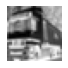

In [79]:
pic=x[:,1:2].reshape(32,32)
plt.imshow(pic, cmap = plt.cm.binary)
figure = plt.gcf()
figure.set_size_inches(1,1)
plt.axis("off")
plt.show()

(32, 32)
[[0.062745101749897, 0.05686274543404579, 0.06470588594675064, 0.06666667014360428, 0.06568627804517746, 0.06568627804517746, 0.0676470622420311, 0.06960784643888474, 0.0833333432674408, 0.12843137979507446, 0.08137255907058716, 0.0990196168422699, 0.125490203499794, 0.1666666716337204, 0.11568628251552582, 0.09509804844856262], [0.060784317553043365, 0.05686274543404579, 0.06568627804517746, 0.0676470622420311, 0.06666667014360428, 0.06666667014360428, 0.0676470622420311, 0.06666667014360428, 0.10784314572811127, 0.1931372582912445, 0.16372549533843994, 0.10490196943283081, 0.12352941930294037, 0.17058824002742767, 0.06470588594675064, 0.10588236153125763], [0.05882353335618973, 0.060784317553043365, 0.06666667014360428, 0.06666667014360428, 0.06568627804517746, 0.06960784643888474, 0.06960784643888474, 0.19509804248809814, 0.19705882668495178, 0.18333333730697632, 0.1872549057006836, 0.14313726127147675, 0.07156863063573837, 0.13333334028720856, 0.08725491166114807, 0.104901

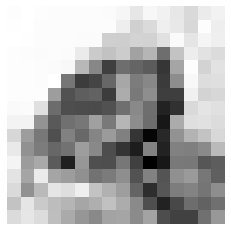

In [ ]:
print(numpy.shape(pic))
repic=[]
for j in range(0,32,2):
  plist=[]
  #print(j)
  for i in range(0,32,2):
    #maxx=max(pic[j][i],pic[j+1][i],pic[j][i+1],pic[i+1][j+1])
    maxx=(pic[j][i]+pic[j+1][i]+pic[j][i+1]+pic[i+1][j+1])/4
    plist.append(maxx)
  repic.append(plist)
print(repic)
repic=numpy.array(repic)
print(numpy.shape(repic))
plt.imshow(repic, cmap = plt.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
import cv2
repic = cv2.resize(pic, dsize=(16, 16), interpolation=cv2.INTER_CUBIC)
plt.imshow(repic, cmap = plt.cm.binary)
figure = plt.gcf()
figure.set_size_inches(0.3,0.3)
plt.axis("off")
plt.show()